In [1]:
from hstar import process
from hstar import datacuts
import numpy as np
import awkward as awk
import vector
import matplotlib.pyplot as plt

2024-10-28 18:40:56.455771: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
Z_mass = 91.18

In [3]:
sample = process.Sample(weight='wt', 
    amplitude = process.Basis.SBI, components = {
    process.Basis.SBI: 'msq_sbi_sm',
    process.Basis.SIG: 'msq_sig_sm',
    process.Basis.BKG: 'msq_bkg_sm',
    process.Basis.INT: 'msq_int_sm'
  })

#sample.open(csv = [
#  '../ggZZ4e_all.csv',
#  '../ggZZ4m_all.csv',
#  '../ggZZ2e2m_all.csv'
#  ], xs=[1.4783394, 0.47412769, 0.47412769], lumi=3000., k=1.83
#)

sample.open(csv = '../ggZZ2e2m_all.csv', xs=0.47412769, lumi=3000, k=1.83)

0          1.321122e-08
1          1.385171e-08
2          7.684210e-09
3          1.018895e-10
4          8.891041e-09
               ...     
2606826    1.628886e-09
2606827    8.882103e-10
2606828    6.835974e-11
2606829    8.139814e-09
2606830    9.310137e-11
Name: msq_sbi_sm, Length: 2606831, dtype: float64
0          2.382824e-10
1          1.464287e-10
2          6.720742e-11
3          2.016814e-12
4          1.242182e-10
               ...     
2606826    3.378906e-11
2606827    1.427201e-11
2606828    1.441803e-11
2606829    9.192225e-11
2606830    2.871757e-12
Name: msq_sig_sm, Length: 2606831, dtype: float64
0          1.385642e-08
1          1.429341e-08
2          7.944555e-09
3          1.039572e-10
4          9.308557e-09
               ...     
2606826    1.684909e-09
2606827    9.063882e-10
2606828    6.761026e-11
2606829    8.459965e-09
2606830    1.025652e-10
Name: msq_bkg_sm, Length: 2606831, dtype: float64
0         -8.834835e-10
1         -5.881285e-10
2         

In [4]:
p1 = vector.array({'px': sample.events['p1_px'], 'py': sample.events['p1_py'], 'pz': sample.events['p1_pz'], 'E': sample.events['p1_E']})
p2 = vector.array({'px': sample.events['p2_px'], 'py': sample.events['p2_py'], 'pz': sample.events['p2_pz'], 'E': sample.events['p2_E']})
p3 = vector.array({'px': sample.events['p3_px'], 'py': sample.events['p3_py'], 'pz': sample.events['p3_pz'], 'E': sample.events['p3_E']})
p4 = vector.array({'px': sample.events['p4_px'], 'py': sample.events['p4_py'], 'pz': sample.events['p4_pz'], 'E': sample.events['p4_E']})
p5 = vector.array({'px': sample.events['p5_px'], 'py': sample.events['p5_py'], 'pz': sample.events['p5_pz'], 'E': sample.events['p5_E']})
p6 = vector.array({'px': sample.events['p6_px'], 'py': sample.events['p6_py'], 'pz': sample.events['p6_pz'], 'E': sample.events['p6_E']})

m34 = (p3 + p4).mass
m35 = (p3 + p5).mass
m36 = (p3 + p6).mass
m45 = (p4 + p5).mass
m46 = (p4 + p6).mass
m56 = (p5 + p6).mass

masses = np.array([m34, m35, m36, m45, m46, m56]).transpose()
label_dict = {'m34':'m56', 'm35':'m46', 'm36':'m45', 'm45':'m36', 'm46':'m35', 'm56':'m34'}

diffs = np.abs(masses - Z_mass)
closest_match_diff = np.min(diffs, axis=1)

label_indices = np.where((diffs.transpose() - closest_match_diff).transpose() == 0.0)[1]

fp_labels = np.array(list(label_dict))[label_indices]
sp_labels = np.array([label_dict[fp_labels[i]] for i in range(len(label_indices))])

first_pair = np.array([masses[i][label_indices[i]] for i in range(len(label_indices))])
second_pair = np.array([masses[i][list(label_dict).index(sp_labels[i])] for i in range(len(label_indices))])

fp_filter_ind = np.where((first_pair <= 115)&(first_pair >= 50))[0]
sp_filter_ind = np.where((second_pair <= 115)&(second_pair >= 50))[0]

filter_indices = np.intersect1d(fp_filter_ind, sp_filter_ind)

fp_labels_filtered = fp_labels[filter_indices]
sp_labels_filtered = sp_labels[filter_indices]

fp_filtered = first_pair[filter_indices]
sp_filtered = second_pair[filter_indices]

events_filtered = sample.events.iloc[filter_indices]

In [5]:
p1 = vector.array({'px': events_filtered['p1_px'], 'py': events_filtered['p1_py'], 'pz': events_filtered['p1_pz'], 'E': events_filtered['p1_E']})
p2 = vector.array({'px': events_filtered['p2_px'], 'py': events_filtered['p2_py'], 'pz': events_filtered['p2_pz'], 'E': events_filtered['p2_E']})
p3 = vector.array({'px': events_filtered['p3_px'], 'py': events_filtered['p3_py'], 'pz': events_filtered['p3_pz'], 'E': events_filtered['p3_E']})
p4 = vector.array({'px': events_filtered['p4_px'], 'py': events_filtered['p4_py'], 'pz': events_filtered['p4_pz'], 'E': events_filtered['p4_E']})
p5 = vector.array({'px': events_filtered['p5_px'], 'py': events_filtered['p5_py'], 'pz': events_filtered['p5_pz'], 'E': events_filtered['p5_E']})
p6 = vector.array({'px': events_filtered['p6_px'], 'py': events_filtered['p6_py'], 'pz': events_filtered['p6_pz'], 'E': events_filtered['p6_E']})

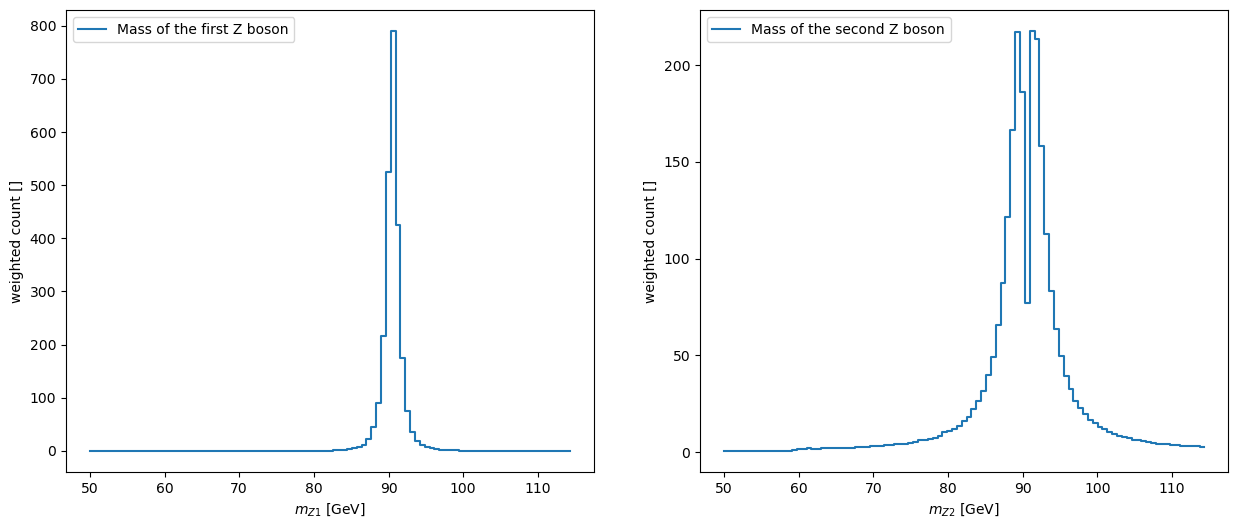

[862072]: 65.01537824339394, [1698297]: 114.98594172847773
[1876219]: 50.00126750398101, [53857]: 114.9999862978986


In [6]:
h_Z1_mass, bins = np.histogram(fp_filtered, bins = 100, range=(50,115), weights=events_filtered['wt'])
h_Z2_mass, bins = np.histogram(sp_filtered, bins = 100, range=(50,115), weights=events_filtered['wt'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.step(bins[:-1], h_Z1_mass, label='Mass of the first Z boson')
ax1.set_xlabel(u'$m_{Z1}$ [GeV]')
ax1.set_ylabel(u'weighted count []')
ax1.legend()

ax2.step(bins[:-1], h_Z2_mass, label='Mass of the second Z boson')
ax2.set_xlabel(u'$m_{Z2}$ [GeV]')
ax2.set_ylabel('weighted count []')
ax2.legend()

plt.show()

print(f'{np.where(fp_filtered == min(fp_filtered))[0]}: {min(fp_filtered)}, {np.where(fp_filtered == max(fp_filtered))[0]}: {max(fp_filtered)}')
print(f'{np.where(sp_filtered == min(sp_filtered))[0]}: {min(sp_filtered)}, {np.where(sp_filtered == max(sp_filtered))[0]}: {max(sp_filtered)}')


In [7]:
evt = datacuts.Events4l(sample)

kinematics = evt.get_kinematics()
print('calculated kinematics')
true_kinematics = evt.get_true_kinematics()


print(kinematics)

pairs_masses = evt.pairs.mass
closest_pair_sq_mass = evt.closest_pair_chi_sq.mass
closest_pair_lim_mass = evt.closest_pair_lim.mass
true_pair_mass = evt.true_pair.mass

print(f'Chi squared accuracy: {np.round(np.sum(((closest_pair_sq_mass==true_pair_mass)).astype(int))/true_pair_mass.shape[0]/true_pair_mass.shape[1],4)}')
print(f'Closest Z accuracy: {np.round(np.sum(((closest_pair_lim_mass==true_pair_mass)|(closest_pair_lim_mass[::-1]==true_pair_mass)).astype(int))/true_pair_mass.shape[0]/true_pair_mass.shape[1],4)}')

initialized momenta
Z1 masses different in  3.576027751703122 % of cases
Z2 masses different in  3.576027751703122 % of cases
found Z
filtered events


/home/max/Uni/WS24/BachelorArbeit/higgs-offshell-interpretation/hstar/datacuts.py:276: RuntimeWarning: invalid value encountered in divide
  phi = z1.dot(n12.cross(n34))/np.abs(z1.dot(n12.cross(n34)))*np.arccos(-n12.dot(n34))
/home/max/Uni/WS24/BachelorArbeit/higgs-offshell-interpretation/hstar/datacuts.py:276: RuntimeWarning: invalid value encountered in arccos
  phi = z1.dot(n12.cross(n34))/np.abs(z1.dot(n12.cross(n34)))*np.arccos(-n12.dot(n34))


calculated kinematics
[[-0.9652383   0.77837678  0.99195773 ...  2.78773346 91.1556868
  91.44988309]
 [ 0.84655105  0.2376012   0.12494818 ... -2.93413464 90.74912456
  92.16922763]
 [-0.82405789  0.25811592  0.39933326 ... -1.08975515 90.68654597
  90.99345034]
 ...
 [ 0.24962116 -0.69044045  0.55448109 ...  0.49651378 91.4529128
  83.01065891]
 [ 0.96846505  0.83322101 -0.29893773 ...  1.63400287 91.53369822
  90.68197959]
 [-0.96624998  0.99989641  0.99989641 ...         nan 87.61075643
  87.61075643]]
Chi squared accuracy: 0.9849
Closest Z accuracy: 0.9685


335
[[ 89.52071778  45.26954043]
 [100.19926357  17.67872368]]
[ 89.52071778 100.19926357]
[ 89.52071778 100.19926357]


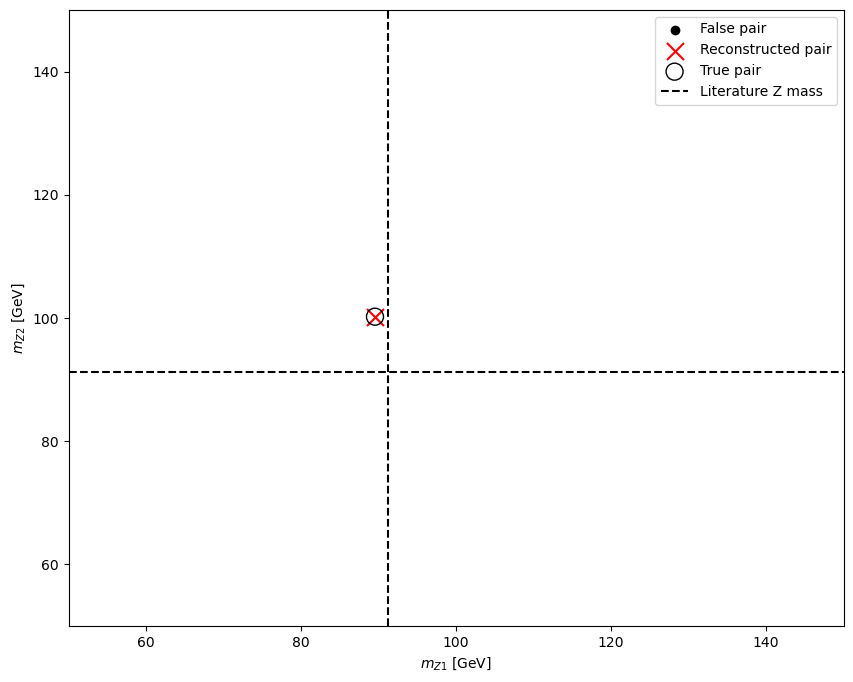

In [8]:
rnd_evt = int(np.floor(np.random.rand(1)[0]*30000))
#delta phi, delta rapidity
good_evts = [382,4942,27762,8922,15962,28171,23414,17672,26854,15199,28538,1395,11990]

#rnd_evt = 29425

#rnd_evt = np.random.choice(good_evts)

#15962,28171,23414

#29425 for chi sq to m4l

#5301 shows closest vs chi sq

print(rnd_evt)

pairs = pairs_masses.transpose(2,1,0)[rnd_evt]

print(pairs)

print(closest_pair_sq_mass.T[rnd_evt])
print(true_pair_mass.T[rnd_evt])

plt.figure(figsize=(10,8))

plt.scatter(pairs[0][1], pairs[1][1],zorder=4,color='k', label='False pair')
plt.scatter(closest_pair_sq_mass.T[rnd_evt,0], closest_pair_sq_mass.T[rnd_evt,1], color='r', zorder=9, marker='x', s=150, label='Reconstructed pair') #
plt.scatter(true_pair_mass.T[rnd_evt,0], true_pair_mass.T[rnd_evt,1], s=150, facecolors='none', edgecolors='k', zorder=9, label='True pair')
#plt.scatter(Z_mass, Z_mass, color='k', label='Z boson mass', zorder=2)
plt.hlines(Z_mass,50,150, linestyles='--', color='k',zorder=1, label='Literature Z mass')
plt.vlines(Z_mass,50,150, linestyles='--', color='k',zorder=1)

#plt.hlines(evt.m4l[rnd_evt]/2,50,250, linestyles='--', color='r',zorder=1, label=u'$m_{4\ell}$/2')
#plt.vlines(evt.m4l[rnd_evt]/2,50,250, linestyles='--', color='r',zorder=1)

plt.xlim(50,150)
plt.ylim(50,150)
plt.xlabel(u'$m_{Z1}$ [GeV]')
plt.ylabel(u'$m_{Z2}$ [GeV]')

plt.legend()

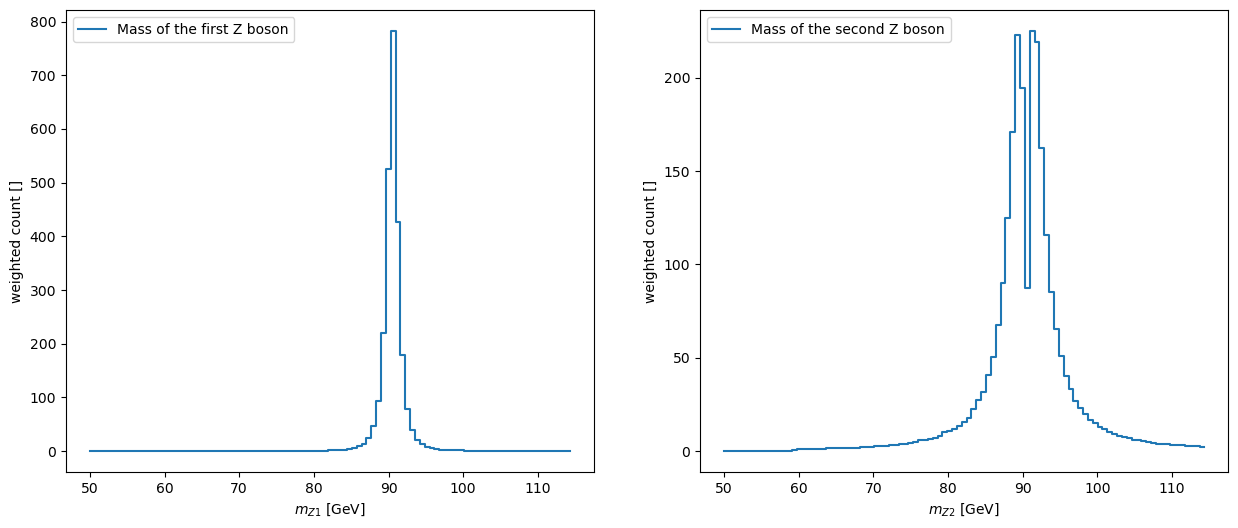

In [9]:
h_Z1_mass, bins = np.histogram(evt.Z1_closest.mass, bins = 100, range=(50,115), weights=evt.df['wt'])
h_Z2_mass, bins = np.histogram(evt.Z2_closest.mass, bins = 100, range=(50,115), weights=evt.df['wt'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.step(bins[:-1], h_Z1_mass, label='Mass of the first Z boson')
ax1.set_xlabel(u'$m_{Z1}$ [GeV]')
ax1.set_ylabel(u'weighted count []')
ax1.legend()

ax2.step(bins[:-1], h_Z2_mass, label='Mass of the second Z boson')
ax2.set_xlabel(u'$m_{Z2}$ [GeV]')
ax2.set_ylabel('weighted count []')
ax2.legend()

plt.show()

(2566361,)
(2566361,)


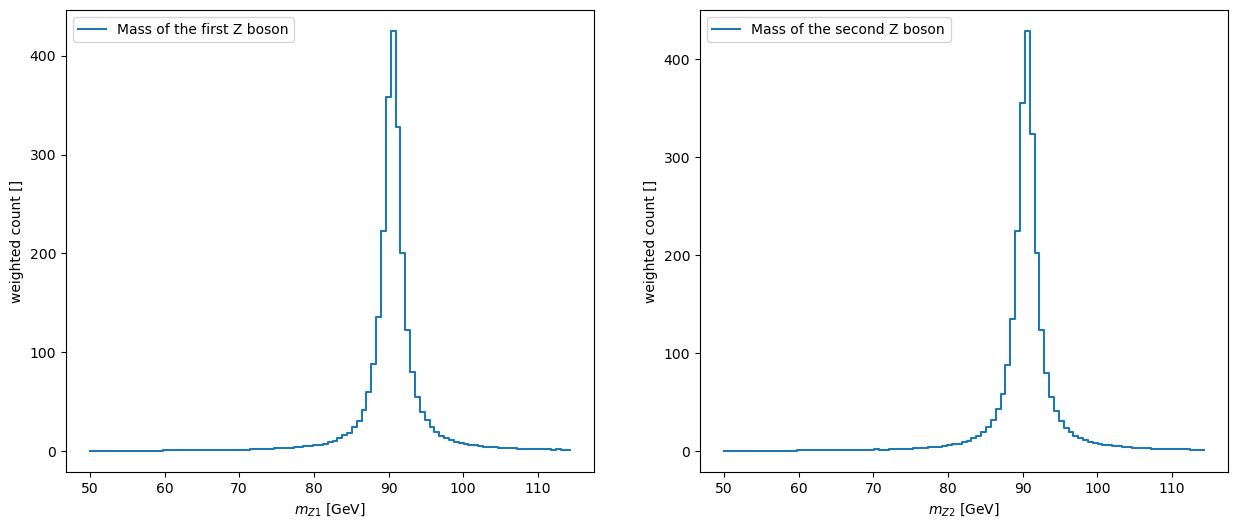

In [10]:
print(evt.df['wt'].shape)
print(evt.Z1.mass.shape)

h_Z1_mass_csq, bins = np.histogram(evt.Z1.mass, bins = 100, range=(50,115), weights=evt.df['wt'])
h_Z2_mass_csq, bins = np.histogram(evt.Z2.mass, bins = 100, range=(50,115), weights=evt.df['wt'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.step(bins[:-1], h_Z1_mass_csq, label='Mass of the first Z boson')
ax1.set_xlabel(u'$m_{Z1}$ [GeV]')
ax1.set_ylabel(u'weighted count []')
ax1.legend()

ax2.step(bins[:-1], h_Z2_mass_csq, label='Mass of the second Z boson')
ax2.set_xlabel(u'$m_{Z2}$ [GeV]')
ax2.set_ylabel('weighted count []')
ax2.legend()

plt.show()

In [11]:
cls_kinematics = evt.get_closest_kinematics()

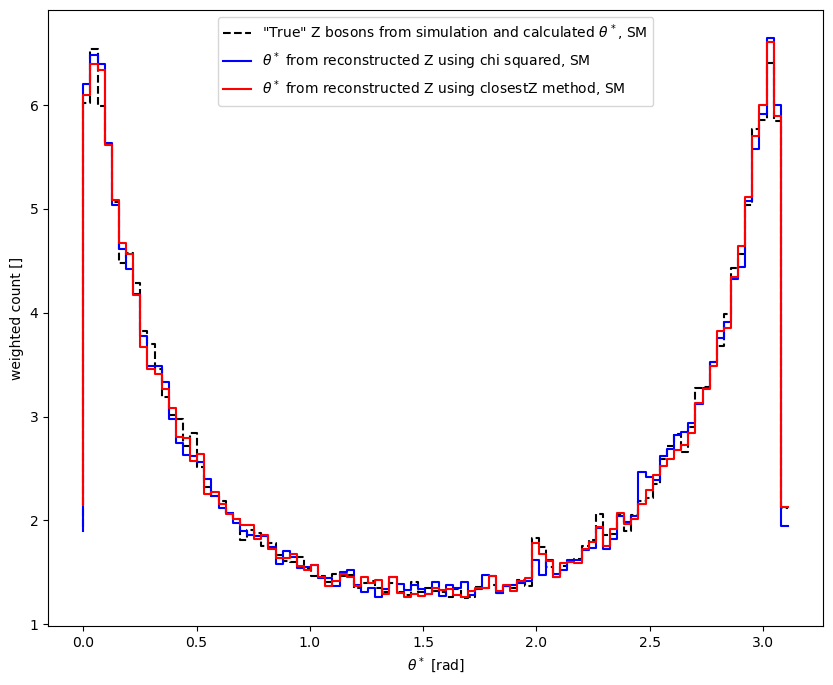

In [12]:
cth_str = kinematics[:,0]
cth_str_true = true_kinematics[:,0]
cth_str_cls = cls_kinematics[:,0]

hist, bins = np.histogram(np.arccos(cth_str), bins=100, range=(0,np.pi), weights=evt.df['wt']*evt.df['msq_sig_sm']/evt.df['msq_sbi_sm'])
hist1, bins1 = np.histogram(np.arccos(cth_str_cls), bins=100, range=(0,np.pi), weights=evt.df['wt']*evt.df['msq_sig_sm']/evt.df['msq_sbi_sm'])
hist2, bins2 = np.histogram(np.arccos(cth_str_true), bins=100, range=(0,np.pi), weights=evt.df['wt']*evt.df['msq_sig_sm']/evt.df['msq_sbi_sm'])

plt.figure(figsize=(10,8))

plt.step(bins2[:-1], hist2, color='k', linestyle='--', label=u'"True" Z bosons from simulation and calculated $\\theta^*$, SM')
plt.step(bins[:-1], hist, color='b', label=u'$\\theta^*$ from reconstructed Z using chi squared, SM')
plt.step(bins1[:-1], hist1, color='r', linestyle='-', label=u'$\\theta^*$ from reconstructed Z using closestZ method, SM')

plt.xlabel(u'$\\theta^*$ [rad]')
plt.ylabel('weighted count []')

plt.legend()



(2498106,) (2498106,)


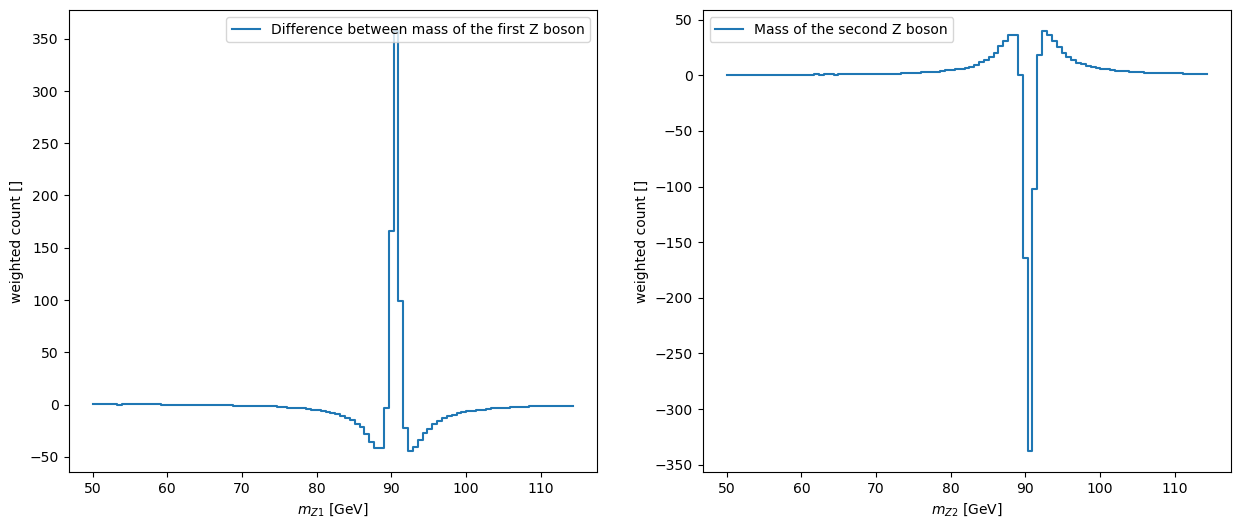

In [13]:
z1_mass = evt.Z1.mass[:len(fp_filtered)]
z2_mass = evt.Z2.mass[:len(sp_filtered)]

fp_filtered = fp_filtered[:len(z1_mass)]
sp_filtered = sp_filtered[:len(z2_mass)]

events_filtered = events_filtered[:len(z1_mass)]


print(z1_mass.shape, np.array(fp_filtered).shape)

h_Z1_mass, bins = np.histogram(evt.Z1_closest.mass, bins = 100, range=(50,115), weights=evt.df['wt'])
h_Z2_mass, bins = np.histogram(evt.Z2_closest.mass, bins = 100, range=(50,115), weights=evt.df['wt'])

fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,6))

ax1.step(bins[:-1], h_Z1_mass-h_Z1_mass_csq, label='Difference between mass of the first Z boson')
ax1.set_xlabel(u'$m_{Z1}$ [GeV]')
ax1.set_ylabel(u'weighted count []')
ax1.legend()

ax2.step(bins[:-1], h_Z2_mass -h_Z1_mass_csq, label='Mass of the second Z boson')
ax2.set_xlabel(u'$m_{Z2}$ [GeV]')
ax2.set_ylabel('weighted count []')
ax2.legend()

plt.show()